# Polarising Alleles

In [34]:
library(data.table)
library(dplyr)

In [2]:
## Chr4 and Chr6

In [2]:
syncFile <-  fread('~/snap_hap/Amolle_syncFiles/Chr6.sync')
# posFile  <- fread('~/snap_hap/Amajus_alleles-ancestral/pos/Chr6.pos')
posFile  <- fread('~/snap_hap/Amajus_alleles-ancestral/pos/test.pos')

In [3]:
RosEl = c(52775014, 53149974)

In [4]:
posFile = posFile[V2 > RosEl[1] & V2 < RosEl[2]]
#nrow(posFile)
#nrow(posFile[V5==V6 | V6 == 0])
#nrow(posFile[!(V5==V6 | V6 == 0)])
posFile = posFile[!(V5==V6 | V6 == 0)]
str(posFile)

Classes ‘data.table’ and 'data.frame':	22115 obs. of  6 variables:
 $ V1: chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ V2: int  52775024 52775025 52775037 52775046 52775052 52775088 52775101 52775126 52775139 52775140 ...
 $ V3: chr  "C" "T" "C" "A" ...
 $ V4: chr  "A" "C" "A" "C" ...
 $ V5: int  2148 2148 2148 2148 2148 2148 2148 2148 2148 2148 ...
 $ V6: int  102 1099 14 31 437 417 1243 78 249 1254 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [5]:
syncFile = syncFile[V2 > RosEl[1] & V2 < RosEl[2]]
str(syncFile)

Classes ‘data.table’ and 'data.frame':	343033 obs. of  6 variables:
 $ V1: chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ V2: int  52775015 52775016 52775017 52775018 52775019 52775020 52775021 52775022 52775023 52775024 ...
 $ V3: chr  "T" "T" "T" "A" ...
 $ V4: chr  "0:3:0:0:0:0" "0:4:0:0:0:0" "0:5:0:0:0:0" "3:0:0:0:0:0" ...
 $ V5: chr  "0:0:0:0:0:0" "0:0:0:0:0:0" "0:0:0:0:0:0" "0:0:0:0:0:0" ...
 $ V6: chr  "0:1:0:0:0:0" "0:2:0:0:0:0" "0:1:0:0:0:0" "2:0:0:0:0:0" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [6]:
merged <- merge(posFile, syncFile[,c(2,4:6)], by='V2')
colnames(merged) <- c("pos", "chrom", "ref", "alt", "AN", "AC", "pop1", "pop2", "pop3")

In [7]:
merged$altFreq_Amajus = merged$AC/merged$AN
merged$refFreq_Amajus = 1-merged$altFreq_Amajus
str(merged)

Classes ‘data.table’ and 'data.frame':	21656 obs. of  11 variables:
 $ pos           : int  52775024 52775025 52775037 52775046 52775052 52775088 52775101 52775126 52775139 52775140 ...
 $ chrom         : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ ref           : chr  "C" "T" "C" "A" ...
 $ alt           : chr  "A" "C" "A" "C" ...
 $ AN            : int  2148 2148 2148 2148 2148 2148 2148 2148 2148 2148 ...
 $ AC            : int  102 1099 14 31 437 417 1243 78 249 1254 ...
 $ pop1          : chr  "0:0:6:0:0:0" "0:6:0:0:0:0" "0:0:7:0:0:0" "9:0:0:0:0:0" ...
 $ pop2          : chr  "0:0:0:0:0:0" "0:0:0:0:0:0" "0:0:0:0:0:0" "1:0:0:0:0:0" ...
 $ pop3          : chr  "0:0:1:0:0:0" "0:1:0:0:0:0" "0:0:2:0:0:0" "3:0:0:0:0:0" ...
 $ altFreq_Amajus: num  0.04749 0.51164 0.00652 0.01443 0.20345 ...
 $ refFreq_Amajus: num  0.953 0.488 0.993 0.986 0.797 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "pos"


In [8]:
# print(merged)
nrow(merged[pos > 52500000 & pos < 53500000])
merged_RosEl <- merged[pos > 52500000 & pos < 53500000]

[1] 21656

## Check anestral and derived alleles

In [9]:
count_popAlleles <- function(alleleSequence, popCounts, allele){
    return(as.integer(unlist(strsplit(popCounts, split = ':'))[which(alleleSequence == allele)]))    
}

check_RefAlt <- function(alleleSequence, popCounts, ref, alt){
    if(sum(as.integer(unlist(strsplit(popCounts, split = ':'))[!alleleSequence %in% c(ref,alt)])) > 0){
        check = 1}
    else{check = 0}
    return(check)
}

In [10]:
alleleSequence <- c('A','T','C','G','N','del')
# data.frame(allele=alleleSequence, index=1:6)
alleleDat <- merged_RosEl

pop1_ref = c() 
pop1_alt = c()
pop2_ref = c()
pop2_alt = c()
pop3_ref = c()
pop3_alt = c()
pop1_check = c()
pop2_check = c()
pop3_check = c()

# for (site in 1:1000){
for (site in 1:nrow(alleleDat)){
    cat(site, alleleDat$pos[site],'\n')
    ref = alleleDat$ref[site]
    alt = alleleDat$alt[site]
    pop1 = alleleDat$pop1[site]
    pop2 = alleleDat$pop2[site]
    pop3 = alleleDat$pop3[site]
    
    pop1_ref = c(pop1_ref, count_popAlleles(alleleSequence, pop1, ref)) 
    pop1_alt = c(pop1_alt, count_popAlleles(alleleSequence, pop1, alt))
    pop2_ref = c(pop2_ref, count_popAlleles(alleleSequence, pop2, ref))
    pop2_alt = c(pop2_alt, count_popAlleles(alleleSequence, pop2, alt))
    pop3_ref = c(pop3_ref, count_popAlleles(alleleSequence, pop3, ref))
    pop3_alt = c(pop3_alt, count_popAlleles(alleleSequence, pop3, alt))
    
    pop1_check = c(pop1_check, check_RefAlt(alleleSequence, pop1, ref, alt))
    pop2_check = c(pop2_check, check_RefAlt(alleleSequence, pop2, ref, alt))
    pop3_check = c(pop3_check, check_RefAlt(alleleSequence, pop3, ref, alt))
}

1 52775024 
2 52775025 
3 52775037 
4 52775046 
5 52775052 
6 52775088 
7 52775101 
8 52775126 
9 52775139 
10 52775140 
11 52775150 
12 52775154 
13 52775158 
14 52775162 
15 52775164 
16 52775168 
17 52775169 
18 52775172 
19 52775173 
20 52775175 
21 52775224 
22 52775242 
23 52775243 
24 52775245 
25 52775265 
26 52775289 
27 52775294 
28 52775390 
29 52775392 
30 52775402 
31 52775414 
32 52775418 
33 52775426 
34 52775428 
35 52775438 
36 52775445 
37 52775448 
38 52775458 
39 52775482 
40 52775491 
41 52775494 
42 52775500 
43 52775506 
44 52775509 
45 52775528 
46 52775546 
47 52775550 
48 52775554 
49 52775587 
50 52775590 
51 52775607 
52 52775609 
53 52775612 
54 52775620 
55 52775630 
56 52775632 
57 52775641 
58 52775648 
59 52775653 
60 52775663 
61 52775670 
62 52775691 
63 52775698 
64 52775699 
65 52775708 
66 52775711 
67 52775716 
68 52775719 
69 52775721 
70 52775730 
71 52775731 
72 52775739 
73 52775745 
74 52775761 
75 52775771 
76 52775781 
77 52775796 
78 52775

In [11]:
str(alleleDat)

Classes ‘data.table’ and 'data.frame':	21656 obs. of  11 variables:
 $ pos           : int  52775024 52775025 52775037 52775046 52775052 52775088 52775101 52775126 52775139 52775140 ...
 $ chrom         : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ ref           : chr  "C" "T" "C" "A" ...
 $ alt           : chr  "A" "C" "A" "C" ...
 $ AN            : int  2148 2148 2148 2148 2148 2148 2148 2148 2148 2148 ...
 $ AC            : int  102 1099 14 31 437 417 1243 78 249 1254 ...
 $ pop1          : chr  "0:0:6:0:0:0" "0:6:0:0:0:0" "0:0:7:0:0:0" "9:0:0:0:0:0" ...
 $ pop2          : chr  "0:0:0:0:0:0" "0:0:0:0:0:0" "0:0:0:0:0:0" "1:0:0:0:0:0" ...
 $ pop3          : chr  "0:0:1:0:0:0" "0:1:0:0:0:0" "0:0:2:0:0:0" "3:0:0:0:0:0" ...
 $ altFreq_Amajus: num  0.04749 0.51164 0.00652 0.01443 0.20345 ...
 $ refFreq_Amajus: num  0.953 0.488 0.993 0.986 0.797 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "pos"


In [12]:
alleleDat$pop1_ref = pop1_ref
alleleDat$pop2_ref = pop2_ref
alleleDat$pop3_ref = pop3_ref

alleleDat$pop1_alt = pop1_alt
alleleDat$pop2_alt = pop2_alt
alleleDat$pop3_alt = pop3_alt

alleleDat$pop1_check = pop1_check
alleleDat$pop2_check = pop2_check
alleleDat$pop3_check = pop3_check

alleleDat <- alleleDat %>% rowwise() %>% 
                    mutate(pop1Counts = pop1_ref+pop1_alt) %>%
                    mutate(pop2Counts = pop2_ref+pop2_alt) %>%
                    mutate(pop3Counts = pop3_ref+pop3_alt) %>%
                    
                    mutate(refCounts = pop1_ref+pop2_ref+pop3_ref) %>%
                    mutate(altCounts = pop1_alt+pop2_alt+pop3_alt) %>%
                    mutate(totalCounts = refCounts+altCounts) %>%
                    mutate(refFreq = refCounts/totalCounts) %>%
                    mutate(altFreq = altCounts/totalCounts) %>%
                    mutate(majFreq_Amajus = ifelse(refFreq_Amajus >= altFreq_Amajus, refFreq_Amajus, altFreq_Amajus)) %>%
                    mutate(majFreq = ifelse(refFreq >= altFreq, refFreq, altFreq)) %>%

                    mutate(majAllele_Amajus = as.factor(ifelse(refFreq_Amajus >= altFreq_Amajus, 'REF', 'ALT'))) %>%
#                    mutate(minAllele_Amajus = ifelse()) %>%
                    mutate(majAllele_Amolle = as.factor(ifelse(refFreq >= altFreq, 'REF', 'ALT'))) #%>%
#                    mutate(minAllele_Amolle = ifelse()) %>%

In [13]:
alleleDat <- as.data.table(alleleDat)
str(alleleDat)

Classes ‘data.table’ and 'data.frame':	21656 obs. of  32 variables:
 $ pos             : int  52775024 52775025 52775037 52775046 52775052 52775088 52775101 52775126 52775139 52775140 ...
 $ chrom           : chr  "Chr6" "Chr6" "Chr6" "Chr6" ...
 $ ref             : chr  "C" "T" "C" "A" ...
 $ alt             : chr  "A" "C" "A" "C" ...
 $ AN              : int  2148 2148 2148 2148 2148 2148 2148 2148 2148 2148 ...
 $ AC              : int  102 1099 14 31 437 417 1243 78 249 1254 ...
 $ pop1            : chr  "0:0:6:0:0:0" "0:6:0:0:0:0" "0:0:7:0:0:0" "9:0:0:0:0:0" ...
 $ pop2            : chr  "0:0:0:0:0:0" "0:0:0:0:0:0" "0:0:0:0:0:0" "1:0:0:0:0:0" ...
 $ pop3            : chr  "0:0:1:0:0:0" "0:1:0:0:0:0" "0:0:2:0:0:0" "3:0:0:0:0:0" ...
 $ altFreq_Amajus  : num  0.04749 0.51164 0.00652 0.01443 0.20345 ...
 $ refFreq_Amajus  : num  0.953 0.488 0.993 0.986 0.797 ...
 $ pop1_ref        : int  6 6 7 9 9 7 11 11 10 10 ...
 $ pop2_ref        : int  0 0 0 1 2 2 2 2 1 2 ...
 $ pop3_ref        :

In [14]:
print(alleleDat[1000:1010, ])

         pos chrom ref alt   AN   AC         pop1         pop2         pop3
 1: 52792499  Chr6   G   T 2148   88  0:0:0:1:0:0  0:0:0:3:0:0  0:0:0:0:0:0
 2: 52792503  Chr6   A   G 2148   85  1:0:0:0:0:0  3:0:0:0:0:0  0:0:0:0:0:0
 3: 52792513  Chr6   G   A 2148  300  0:0:0:1:0:0  0:0:0:3:0:0  0:0:0:0:0:0
 4: 52792517  Chr6   T   C 2148  113  0:1:0:0:0:0  0:4:0:0:0:0  0:0:0:0:0:0
 5: 52792519  Chr6   A   C 2148   77  1:0:0:0:0:0  4:0:0:0:0:0  0:0:0:0:0:0
 6: 52792521  Chr6   A   G 2148  154  1:0:0:0:0:0  4:0:0:0:0:0  0:0:0:0:0:0
 7: 52792523  Chr6   A   G 2148 1079  0:0:0:1:0:0  0:0:0:4:0:0  0:0:0:0:0:0
 8: 52792641  Chr6   C   T 2148    4  0:0:0:0:0:0  0:2:0:0:0:0  0:0:0:0:0:0
 9: 52792647  Chr6   C   T 2148  114  0:0:0:0:0:0  0:0:3:0:0:0  0:0:0:0:0:0
10: 52792655  Chr6   G   A 2148  555  0:0:0:0:0:0  0:0:0:3:0:0  0:0:0:0:0:0
11: 52793610  Chr6   C   T 2148   67 0:0:34:0:0:0 0:0:18:0:0:0 0:0:24:0:0:0
    altFreq_Amajus refFreq_Amajus pop1_ref pop2_ref pop3_ref pop1_alt pop2_alt
 1:    0.

In [79]:
table(alleleDat$majFreq)


              0.5 0.503703703703704 0.503875968992248 0.503937007874016 
               45                 1                 1                 1 
0.504201680672269 0.504347826086956 0.504587155963303 0.504854368932039 
                2                 1                 1                 1 
0.504950495049505 0.505154639175258 0.505263157894737 0.505376344086022 
                1                 2                 1                 1 
0.505494505494505 0.505747126436782 0.506024096385542 0.506172839506173 
                1                 1                 1                 2 
0.506493506493506 0.506666666666667 0.506849315068493 0.507042253521127 
                1                 2                 2                 2 
0.507246376811594 0.507462686567164 0.507936507936508 0.508333333333333 
                1                 1                 1                 2 
0.508474576271186 0.508771929824561 0.509090909090909 0.509259259259259 
                3                 3               

In [15]:
nrow(alleleDat[refFreq == 0.5 | refFreq_Amajus == 0.5])

[1] 42

In [125]:
alleleDat = alleleDat[AC != AN | AC == 0]

# Total sites
nrow(alleleDat)

# Amajus major allele is FIXED in Amolle
nrow(alleleDat[refFreq!=0.5 & refFreq_Amajus!=0.5][pop1_check==0 & pop2_check==0 & pop3_check==0][majAllele_Amajus == majAllele_Amolle & majFreq == 1])

# Amajus minor allele is FIXED in Amolle
nrow(alleleDat[refFreq!=0.5 & refFreq_Amajus!=0.5][pop1_check==0 & pop2_check==0 & pop3_check==0][majAllele_Amajus != majAllele_Amolle & majFreq == 1])

# Amajus minor allele is FIXED in Amolle
nrow(alleleDat[refFreq!=0.5 & refFreq_Amajus!=0.5][pop1_check==0 & pop2_check==0 & pop3_check==0][majAllele_Amajus == majAllele_Amolle & majFreq != 1])
# Amajus minor allele is FIXED in Amolle
nrow(alleleDat[refFreq!=0.5 & refFreq_Amajus!=0.5][pop1_check==0 & pop2_check==0 & pop3_check==0][majAllele_Amajus != majAllele_Amolle & majFreq != 1])

nrow(alleleDat[refFreq!=0.5 & refFreq_Amajus!=0.5][pop1_check!=0 | pop2_check!=0 | pop3_check!=0])

nrow(alleleDat[refFreq==0.5 | refFreq_Amajus==0.5])

[1] 27351

[1] 19029

[1] 553

[1] 4456

[1] 1445

[1] 1771

[1] 46

In [136]:
46+1771+1445+4456+553+19029

1805+25546
1805+45+25483
1805+23523+2005
1805+23127+2419
1805+21953+3575

[1] 27300

[1] 27351

[1] 27333

[1] 27333

[1] 27351

[1] 27333

In [42]:
## FINAL ####
## Total sites
nrow(alleleDat)
#nrow(alleleDat[AC==0])
#nrow(alleleDat[AC==AN])
#nrow(alleleDat[majFreq == 0.5 | majFreq_Amajus == 0.5])

## Sites with no Amolle information
nrow(alleleDat[totalCounts == 0])

## Sites where Amolle and Amajus are polymorphic for different alleles
nrow(alleleDat[totalCounts != 0]
     [pop1_check==1 | pop2_check==1 | pop3_check==1])

## Amajus major allele is FIXED in Amolle
#nrow(alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0])
nrow(alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0]
     [majFreq == 1]
     [majAllele_Amajus == majAllele_Amolle])

## Amajus minor allele is FIXED in Amolle
nrow(alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0]
     [majFreq == 1]
     [majAllele_Amajus != majAllele_Amolle])

## Amajus and Amolle have same major allele
nrow(alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0]
     [majFreq != 1]
     [majAllele_Amajus == majAllele_Amolle])

## Amajus and Amolle have different major allele
nrow(alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0]
     [majFreq != 1]
     [majAllele_Amajus != majAllele_Amolle])

[1] 21656

[1] 42

[1] 1409

[1] 14187

[1] 545

[1] 4091

[1] 1382

In [36]:
42+1409+14187+545+5473
42+1409+14187+545+4091+1382
9710+6688+2538+1429+500+337+454

[1] 21656

[1] 21656

[1] 21656

In [39]:
count_bins <- c(0, 3, 5, 10, 33, 66, 100, 1000)

## Perform binning and counting
print(alleleDat[, .N, by = .(bin = cut(totalCounts, breaks = count_bins, right = FALSE))])

           bin    N
1:      [5,10)  500
2:     [10,33) 1429
3:     [33,66) 2538
4:    [66,100) 6688
5:       [0,3)  454
6:       [3,5)  337
7: [100,1e+03) 9710


In [35]:
nrow(alleleDat[totalCounts >= 100])
nrow(alleleDat[totalCounts >= 66 & totalCounts < 100])
nrow(alleleDat[totalCounts >= 33 & totalCounts < 66])
nrow(alleleDat[totalCounts >= 10 & totalCounts < 33])
nrow(alleleDat[totalCounts >= 5 & totalCounts < 10])
nrow(alleleDat[totalCounts >= 3 & totalCounts < 5])
nrow(alleleDat[totalCounts < 3])

[1] 9710

[1] 6688

[1] 2538

[1] 1429

[1] 500

[1] 337

[1] 454

In [40]:
## Total sites
nrow(alleleDat)

## Sites with >100 reads OR each population is well sequences
nrow(alleleDat[pop1Counts >= 20 & pop2Counts >= 20 & pop3Counts >= 20])
nrow(alleleDat[pop1Counts >= 5 & pop2Counts >= 5 & pop3Counts >= 5])
#nrow(alleleDat[totalCounts >= 100 & pop1Counts >= 20 & pop2Counts >= 20 & pop3Counts >= 20])

## At least 1 population is well sequenced
nrow(alleleDat[pop1Counts >= 33 | pop2Counts >= 33 | pop3Counts >= 33])
nrow(alleleDat[pop1Counts >= 10 | pop2Counts >= 10 | pop3Counts >= 10])

## 
#nrow(alleleDat[pop1Counts >= 20 | pop2Counts >= 20 | pop3Counts >= 20])

[1] 21656

[1] 11983

[1] 18677

[1] 15828

[1] 19880

In [51]:
count_bins <- c(0, 3, 5, 10, 33, 66, 100, 1000)

## Sites where Amolle and Amajus are polymorphic for different alleles
alleleDat_diffPolySites <- (alleleDat[totalCounts != 0][pop1_check==1 | pop2_check==1 | pop3_check==1])
counts <- alleleDat_diffPolySites[, .N, by = .(bin = cut(totalCounts, breaks = count_bins, right = FALSE))]
print(counts[order(counts$bin)])

           bin   N
1:       [0,3)  31
2:       [3,5)  18
3:      [5,10)  36
4:     [10,33) 172
5:     [33,66) 293
6:    [66,100) 531
7: [100,1e+03) 328


In [54]:
count_bins <- c(0, 3, 5, 10, 33, 66, 100, 1000)

## Amajus major allele is FIXED in Amolle
alleleDat_majorFixed <- (alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0]
     [majFreq == 1]
     [majAllele_Amajus == majAllele_Amolle])
counts <- alleleDat_majorFixed[, .N, by = .(bin = cut(totalCounts, breaks = count_bins, right = FALSE))]
print(counts[order(counts$bin)])

           bin    N
1:       [0,3)  331
2:       [3,5)  270
3:      [5,10)  387
4:     [10,33)  977
5:     [33,66) 1522
6:    [66,100) 4181
7: [100,1e+03) 6519


In [55]:
count_bins <- c(0, 3, 5, 10, 33, 66, 100, 1000)

## Amajus minor allele is FIXED in Amolle
alleleDat_minorFixed <- (alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0]
     [majFreq == 1]
     [majAllele_Amajus != majAllele_Amolle])
counts <- alleleDat_minorFixed[, .N, by = .(bin = cut(totalCounts, breaks = count_bins, right = FALSE))]
print(counts[order(counts$bin)])

           bin   N
1:       [0,3)  40
2:       [3,5)  10
3:      [5,10)  10
4:     [10,33)  49
5:     [33,66)  72
6:    [66,100) 198
7: [100,1e+03) 166


In [56]:
count_bins <- c(0, 3, 5, 10, 33, 66, 100, 1000)

## Amajus and Amolle have same major allele
alleleDat_sameMaj = (alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0]
     [majFreq != 1]
     [majAllele_Amajus == majAllele_Amolle])

counts <- alleleDat_sameMaj[, .N, by = .(bin = cut(totalCounts, breaks = count_bins, right = FALSE))]
print(counts[order(counts$bin)])

           bin    N
1:       [0,3)    9
2:       [3,5)   26
3:      [5,10)   50
4:     [10,33)  178
5:     [33,66)  482
6:    [66,100) 1285
7: [100,1e+03) 2061


In [57]:
count_bins <- c(0, 3, 5, 10, 33, 66, 100, 1000)

## Amajus and Amolle have different major allele
alleleDat_diffMaj = (alleleDat[totalCounts != 0][pop1_check==0 & pop2_check==0 & pop3_check==0]
     [majFreq != 1]
     [majAllele_Amajus != majAllele_Amolle])

counts <- alleleDat_diffMaj[, .N, by = .(bin = cut(totalCounts, breaks = count_bins, right = FALSE))]
print(counts[order(counts$bin)])

           bin   N
1:       [0,3)   1
2:       [3,5)  13
3:      [5,10)  17
4:     [10,33)  53
5:     [33,66) 169
6:    [66,100) 493
7: [100,1e+03) 636


In [137]:
summary(alleleDat$majAllele_Amolle)

REF   ALT  NA's 
23424  3876    51

In [158]:
which(!alleleDat$majAllele_Amolle %in% c('REF','ALT'))

[1]   334   337   339   671   850  1137  2651  4508  4510  4513  7574  7828
[13]  7872  7905  7918  7941  7972  7982  8055  8057  8067  8100  8102  8251
[25]  8258  8267  8366  8409  8453  8585 10057 10070 10074 11036 11037 11205
[37] 12158 12336 13401 15024 15495 15512 15519 17290 17291 17609 18467 20325
[49] 22334 25029 27158

In [160]:
print(alleleDat[which(!alleleDat$majAllele_Amolle %in% c('REF','ALT')),])

         pos chrom ref alt   AN   AC         pop1         pop2          pop3
 1: 52780402  Chr6   G   A 2148    0  0:0:0:0:0:0  0:0:0:0:0:0   0:0:0:0:0:0
 2: 52780479  Chr6   G   A 2148   87  0:0:0:0:0:0  0:0:0:0:0:0   0:0:0:0:0:0
 3: 52780499  Chr6   G   A 2148   77  0:0:0:0:0:0  0:0:0:0:0:0   0:0:0:0:0:0
 4: 52784644  Chr6   T   C 2148  101  0:0:0:0:0:4  0:0:0:0:0:0   0:0:0:0:0:0
 5: 52787356  Chr6   T   C 2148 1721  0:0:0:0:0:0  0:0:0:0:0:0   0:0:0:0:0:0
 6: 52792032  Chr6   T   C 2148  453  0:0:0:0:0:0  0:0:0:0:0:0   0:0:0:0:0:0
 7: 52813552  Chr6   T   C 2148    7 0:0:0:0:0:43 0:0:0:0:0:18  1:0:0:0:0:14
 8: 52834668  Chr6   G   A 2148    0  0:0:0:0:0:0  0:0:0:0:0:0   0:0:0:0:0:0
 9: 52834681  Chr6   A   G 2148  139  0:0:0:0:0:0  0:0:0:0:0:0   0:0:0:0:0:0
10: 52834716  Chr6   T   G 2148  104  0:0:0:0:0:0  0:0:0:0:0:0   0:0:0:0:0:0
11: 52877766  Chr6   A   T 2144  243  0:0:0:0:0:1  0:0:0:0:0:2   0:0:0:0:0:1
12: 52882422  Chr6   A   G 2148   63 0:52:0:0:0:0 0:23:0:0:0:0  0:26:0:0:0:0

In [113]:
nrow(alleleDat[pop1_check==1 | pop2_check==1 | pop3_check==1])
#nrow(alleleDat[pop1_check==0 & pop2_check==0 & pop3_check==0])
nrow(alleleDat[pop1_check==0 & pop2_check==0 & pop3_check==0][majFreq==0.5 | majFreq_Amajus==0.5])
nrow(alleleDat[pop1_check==0 & pop2_check==0 & pop3_check==0][!(majFreq==0.5 | majFreq_Amajus==0.5)])
nrow(alleleDat[pop1_check==0 & pop2_check==0 & pop3_check==0][majFreq!=0.5 & majFreq_Amajus!=0.5])

[1] 1805

[1] 25546

[1] 45

[1] 25483

[1] 25483

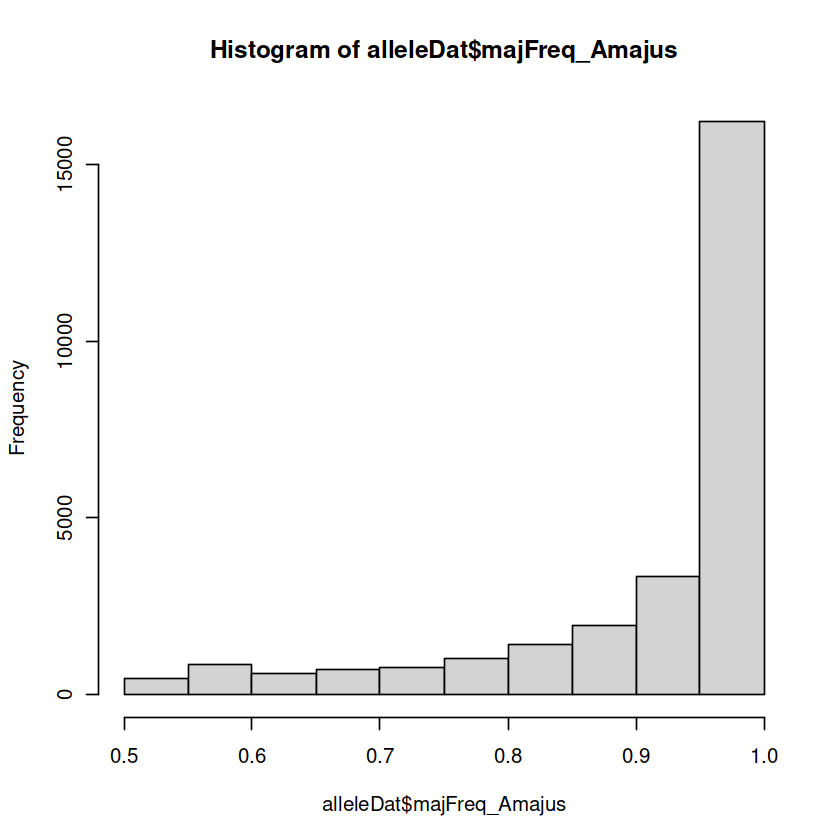

In [109]:
hist(alleleDat$majFreq_Amajus)

In [27]:
table(alleleDat$pop1Counts)
table(alleleDat$pop2Counts)
table(alleleDat$pop3Counts)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
967 544 354 306 288 194 177 167 196 186 195 147 181 187 229 166 175 168 152 174 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
187 177 184 216 206 228 256 243 241 248 318 297 310 306 320 350 386 493 458 489 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
524 515 568 603 607 680 708 752 707 739 733 763 667 639 628 674 616 561 590 513 
 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79 
456 439 383 327 259 252 183 169 156 128  99  77  75  64  54  49  31  24  29  14 
 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 
 24  12  11   9   8   8   9  12  10  12  12  11   5   8   9  11   2   8   5   7 
100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 
  9   6   8   4   5   3   7   3   4   4   3   2   4   2   3   1   8   1   2   1 
120 121 122 123 124 125 126


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 897  756  582  441  461  353  278  254  282  314  331  360  407  458  532  652 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 727  830  904  945  997 1137 1174 1146 1179 1219 1127 1070 1038  936  838  785 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 714  642  539  445  352  284  209  177  117  100   58   39   41   26   28   23 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
  14   20   10   16    8   17    7   14   13   16   13    6    8    7    3    2 
  64   65   66   67   68   69   70   71   72   73   77   78   79   80   81   82 
   1    2    3    5    2    3    2    1    1    3    1    1    8    2    1    2 
  83   84   85   87 
   1    1    2    1 


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 887  658  492  257  232  217  225  227  234  257  226  257  311  306  310  323 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 323  400  453  532  604  676  774  830  934 1035 1101 1093 1222 1108 1166 1168 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
1094 1019  947  801  694  644  530  428  364  286  244  205  191  152  102   81 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
  79   68   50   52   61   41   39   41   33   29   34   31   24   14   26   15 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
  14   10   16   15   10   19   12    5    8   11   11   12    4    7    2    3 
  80   82   83 
   1    3    1 

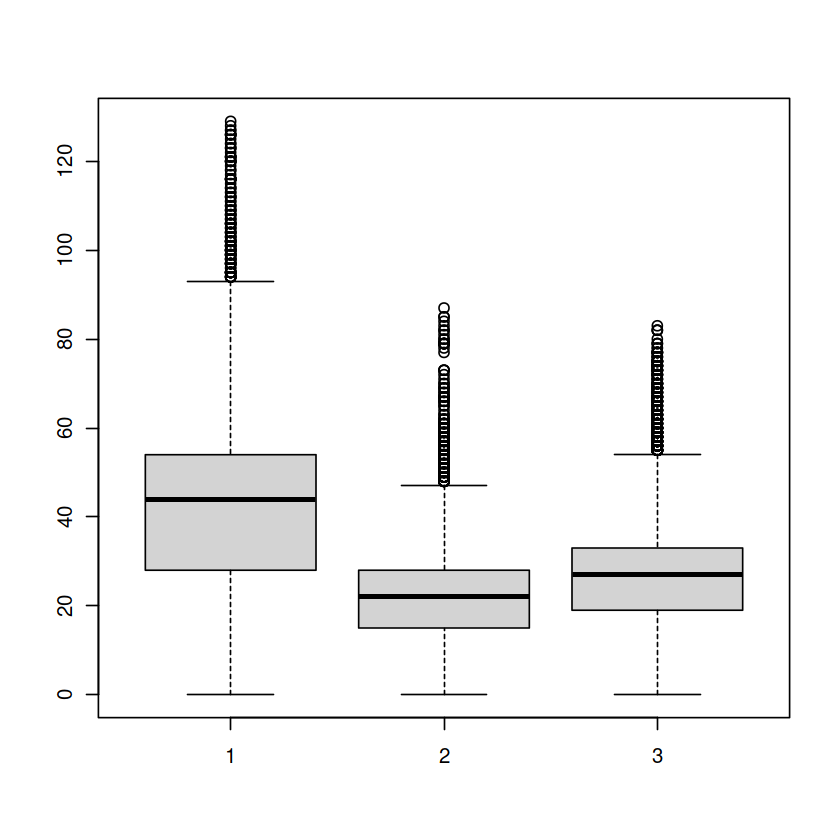

In [56]:
boxplot(alleleDat$pop1Counts, alleleDat$pop2Counts, alleleDat$pop3Counts)

In [67]:
#1
nrow(alleleDat)

#2 ref&alt not same
nrow(alleleDat[pop1_check == 1 | pop2_check == 1 | pop3_check == 1])

#3 Amolle monomorphic ref
nrow(alleleDat[pop1_check == 0 & pop2_check == 0 & pop3_check == 0][refFreq == 1 | altFreq == 1])

#4 Amolle monomorphic alt
#nrow(alleleDat[pop1_check == 0 & pop2_check == 0 & pop3_check == 0][altFreq == 1])

#5
nrow(alleleDat[pop1_check == 0 & pop2_check == 0 & pop3_check == 0][refFreq != 1 & altFreq != 1 & majAllele_Amajus == majAllele_Amolle])
#6
nrow(alleleDat[pop1_check == 0 & pop2_check == 0 & pop3_check == 0][refFreq != 1 & altFreq != 1 & majAllele_Amajus != majAllele_Amolle])
#7
#nrow(alleleDat[pop1_check == 0 & pop2_check == 0 & pop3_check == 0][refFreq != 1 & altFreq != 1 & altFreq == refFreq])

[1] 27421

[1] 1813

[1] 19623

[1] 4484

[1] 1483

In [66]:
1813+18064+1559+4484+1483

[1] 27403

In [ ]:
#1
nrow(alleleDat)
#2
nrow(alleleDat[pop1Counts >= 20 & pop2Counts >= 20 & pop3Counts >= 20 & totalCounts >= 100])
nrow(alleleDat[pop1Counts >= 20 & pop2Counts >= 20 & pop3Counts >= 20])
#3


In [40]:
nrow(alleleDat[totalCounts >= 100 &
               pop1Counts >= 20 & pop2Counts >= 20 & pop3Counts >= 20])

nrow(alleleDat[totalCounts >= 60 & totalCounts < 100 &
               (pop1Counts >= 5 | pop2Counts >= 5 | pop3Counts >= 5)])

nrow(alleleDat[totalCounts >= 30 & totalCounts < 60 &
               (pop1Counts >= 33 | pop2Counts >= 33 | pop3Counts >= 33)])

nrow(alleleDat[totalCounts >= 10 & totalCounts < 30 &
               (pop1Counts >= 10 | pop2Counts >= 10 | pop3Counts >= 10)])

nrow(alleleDat[totalCounts >= 5 & totalCounts < 10 &
               (pop1Counts >= 0 | pop2Counts >= 0 | pop3Counts >= 0)])

nrow(alleleDat[totalCounts >= 3 & totalCounts < 5 &
               (pop1Counts >= 0 | pop2Counts >= 0 | pop3Counts >= 0)])

nrow(alleleDat[totalCounts >= 1 & totalCounts < 3 &
               (pop1Counts >= 0 | pop2Counts >= 0 | pop3Counts >= 0)])

[1] 35580

[1] 22641

[1] 753

[1] 2241

[1] 1299

[1] 929

[1] 1334

In [48]:
alleleDat_check0 <- alleleDat[pop1_check == 0 & pop2_check == 0 & pop3_check == 0]
nrow(alleleDat_check0)
nrow(alleleDat_check0[refCounts == 0])
nrow(alleleDat_check0[altCounts == 0])
nrow(alleleDat_check0[refCounts != 0 & altCounts != 0 & refCounts > altCounts])
nrow(alleleDat_check0[refCounts != 0 & altCounts != 0 & altCounts > refCounts])

[1] 70979

[1] 3342

[1] 47178

[1] 13701

[1] 6683

In [47]:
nrow(alleleDat[pop1_check > 0 | pop2_check > 0 | pop3_check > 0])
4436 + 70979
# nrow(alleleDat[pop2_check > 0])
# nrow(alleleDat[pop3_check > 0])

[1] 4436

[1] 75415

In [30]:
cat('RosEl region\n\n\n')
cat('Total no. of sites:', nrow(alleleDat))
cat('\nTotal no. of sites with total alleleCount < 5:', nrow(alleleDat[totalCounts < 5]))
cat('\nTotal no. of sites with total alleleCount < 3:', nrow(alleleDat[totalCounts < 3]))
cat('\nTotal no. of sites with total alleleCount < 2:', nrow(alleleDat[totalCounts < 2]))
cat('\nTotal no. of sites with total alleleCount = 0:', nrow(alleleDat[totalCounts == 0]))

cat('\n\nWithin sites with total alleleCount ≥ 5\n')
cat('\nTotal no. of monomorphic REF sites:', nrow(alleleDat[totalCounts >= 5 & altCounts == 0]))
cat('\nTotal no. of monomorphic ALT sites:', nrow(alleleDat[totalCounts >= 5 & refCounts == 0]))
cat('\nTotal no. of polymorphic sites:', nrow(alleleDat[totalCounts >= 5 & altCounts != 0 & refCounts != 0]))

cat('\n\nWithin sites with total alleleCount ≥ 3\n')
cat('\nTotal no. of monomorphic REF sites:', nrow(alleleDat[totalCounts >= 3 & altCounts == 0]))
cat('\nTotal no. of monomorphic ALT sites:', nrow(alleleDat[totalCounts >= 3 & refCounts == 0]))
cat('\nTotal no. of polymorphic sites:', nrow(alleleDat[totalCounts >= 3 & altCounts != 0 & refCounts != 0]))

cat('\n\nWithin sites with total alleleCount ≥ 2\n')
cat('\nTotal no. of monomorphic REF sites:', nrow(alleleDat[totalCounts >= 2 & altCounts == 0]))
cat('\nTotal no. of monomorphic ALT sites:', nrow(alleleDat[totalCounts >= 2 & refCounts == 0]))
cat('\nTotal no. of polymorphic sites:', nrow(alleleDat[totalCounts >= 2 & altCounts != 0 & refCounts != 0]))

# 
# cat('\nTotal no. of polymorphic sites:', nrow(alleleDat[altCounts != 0 & refCounts != 0]))
# cat('\nTotal no. of polymorphic sites with total alleleCount ≥ 5:', nrow(alleleDat[altCounts != 0 & refCounts != 0 & totalCounts>=5]))

RosEl region


Total no. of sites: 75415
Total no. of sites with total alleleCount < 5: 2364
Total no. of sites with total alleleCount < 3: 1435
Total no. of sites with total alleleCount < 2: 929
Total no. of sites with total alleleCount = 0: 101

Within sites with total alleleCount ≥ 5

Total no. of monomorphic REF sites: 47925
Total no. of monomorphic ALT sites: 3393
Total no. of polymorphic sites: 21733

Within sites with total alleleCount ≥ 3

Total no. of monomorphic REF sites: 48715
Total no. of monomorphic ALT sites: 3433
Total no. of polymorphic sites: 21832

Within sites with total alleleCount ≥ 2

Total no. of monomorphic REF sites: 49138
Total no. of monomorphic ALT sites: 3485
Total no. of polymorphic sites: 21863

In [3]:
fwrite(alleleDat, file='~/snap_hap/Amajus_alleles-ancestral/alleleDat_RosEl_Chr6.tsv', sep='\t', row.names = F, col.names=T, quote=F)

ERROR: Error in eval(expr, envir, enclos): object 'alleleDat' not found


In [151]:

(alleleDat[totalCounts == 2])

pos,chrom,ref,alt,pop1,pop2,pop3,pop1_ref,pop2_ref,pop3_ref,pop1_alt,pop2_alt,pop3_alt,refCounts,altCounts,totalCounts,refFreq,altFreq
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
52504936,Chr1,G,T,0:0:0:0:0:0,0:0:0:1:0:0,0:0:0:1:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0
52504962,Chr1,A,G,0:0:0:0:0:0,1:0:0:0:0:0,1:0:0:0:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0
52504977,Chr1,A,G,0:0:0:0:0:0,1:0:0:0:0:0,1:0:0:0:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0
52504981,Chr1,A,T,0:0:0:0:0:0,1:0:0:0:0:0,1:0:0:0:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0
52504982,Chr1,T,A,0:0:0:0:0:0,0:1:0:0:0:0,0:1:0:0:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0
52504993,Chr1,A,G,0:0:0:0:0:0,1:0:0:0:0:0,1:0:0:0:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0
52505000,Chr1,C,T,0:0:0:0:0:0,0:0:1:0:0:0,0:0:1:0:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0
52505009,Chr1,G,C,0:0:0:0:0:0,0:0:0:1:0:0,0:0:0:1:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0
52505012,Chr1,C,T,0:0:0:0:0:0,0:0:1:0:0:0,0:0:1:0:0:0,0,1,1,0,0,0,2,0,2,1.0,0.0


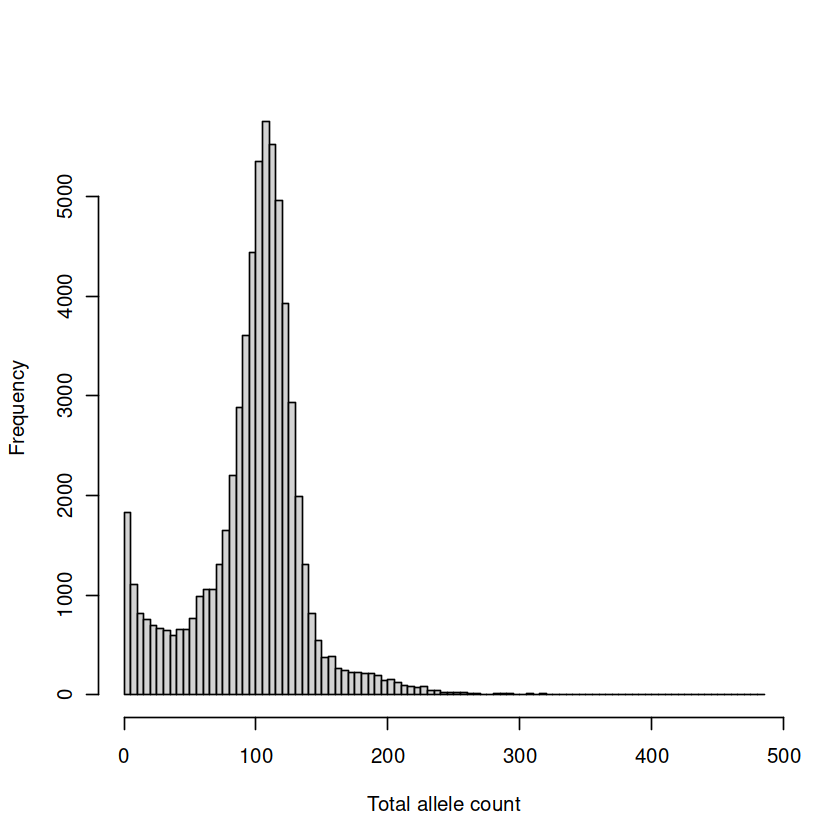

In [127]:
hist(alleleDat$totalCounts, breaks = 100, xlab='Total allele count', main = '')

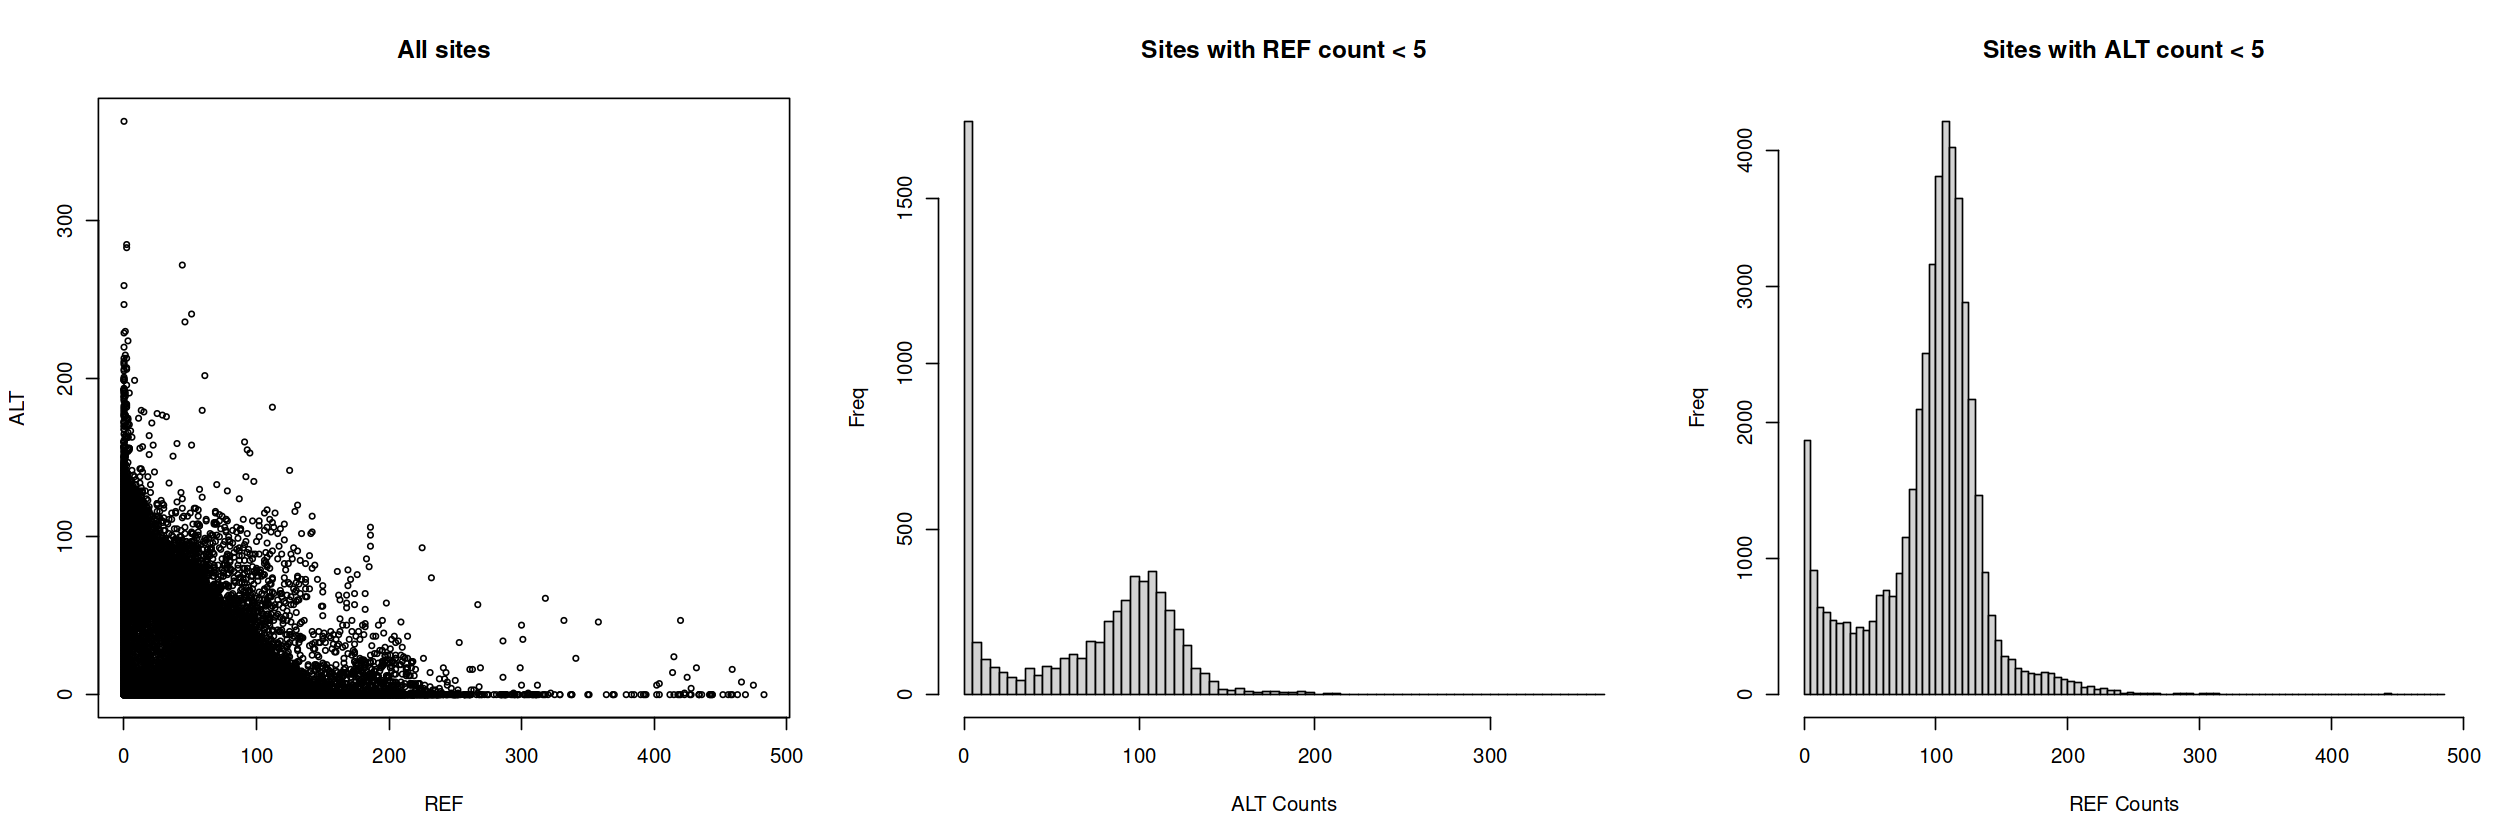

In [142]:
options(repr.plot.width=21, repr.plot.height=7)
par(mfrow=c(1,3), cex = 1)
plot(altCounts~refCounts, alleleDat, cex=0.5, xlab='REF', ylab='ALT', main='All sites')
hist(alleleDat[refCounts<5]$altCounts, breaks=100, xlab='ALT Counts', ylab='Freq', main='Sites with REF count < 5')
hist(alleleDat[altCounts<5]$refCounts, breaks=100, xlab='REF Counts', ylab='Freq', main='Sites with ALT count < 5')

In [121]:
## Within all polymorphic sites with >5
plot(altCounts~totalCounts, alleleDat[], log='x')


[1] 63276

[1] 63276

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“105 x values <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“105 x values <= 0 omitted from logarithmic plot”


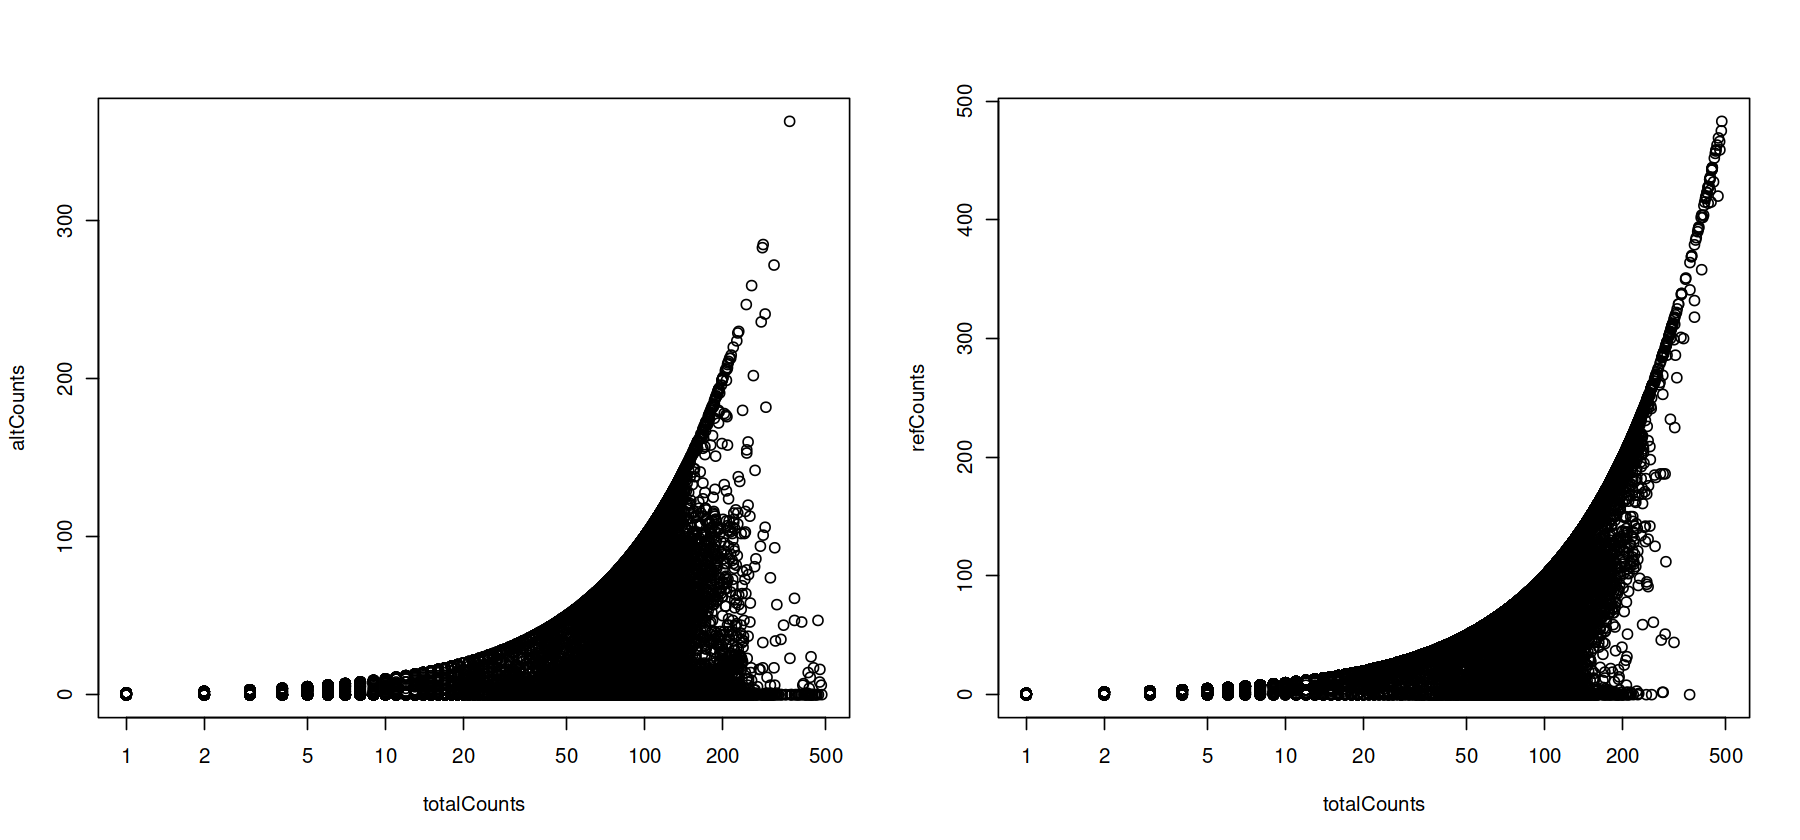

In [143]:
options(repr.plot.width=15, repr.plot.height=7)
par(mfrow=c(1,2))
plot(altCounts~totalCounts, alleleDat, log='x')
plot(refCounts~totalCounts, alleleDat, log='x')